In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                             )

In [ ]:
prot_aa_size = {
    "32xsuntag": 796,
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390
}

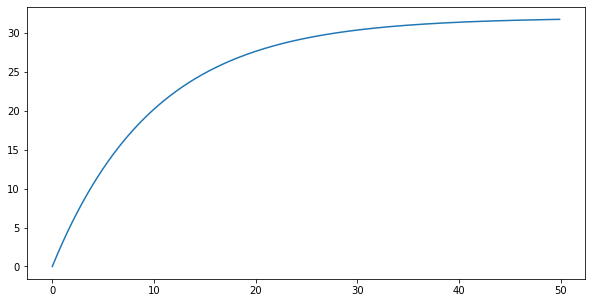

In [142]:
# Translation profil for one protein

translation_rate = 30 #(aa/s)

k = 0.1
fluo_max = 32
x = np.arange(50, step=0.1)
y = fluo_max - fluo_max * np.exp(-k * x)

fig, ax = plt.subplots()
ax.plot(x, y)

fig.set_size_inches((10, 5))

In [149]:
# global signal
x_global = np.arange(1200, step=0.1)
y_global = np.zeros(len(x_global))

binding_rate = 1/60

for i in range(len(x_global)):
    n_rand = np.random.rand()
    if n_rand < binding_rate:
        if i > (len(x_global)-len(x)):
            y_global[i:i+len(x)] += y[:len(y_global[i:i+len(x)])]
        else:
            y_global[i:i+len(x)] += y
            
y_global -= np.min(y_global[2000:])

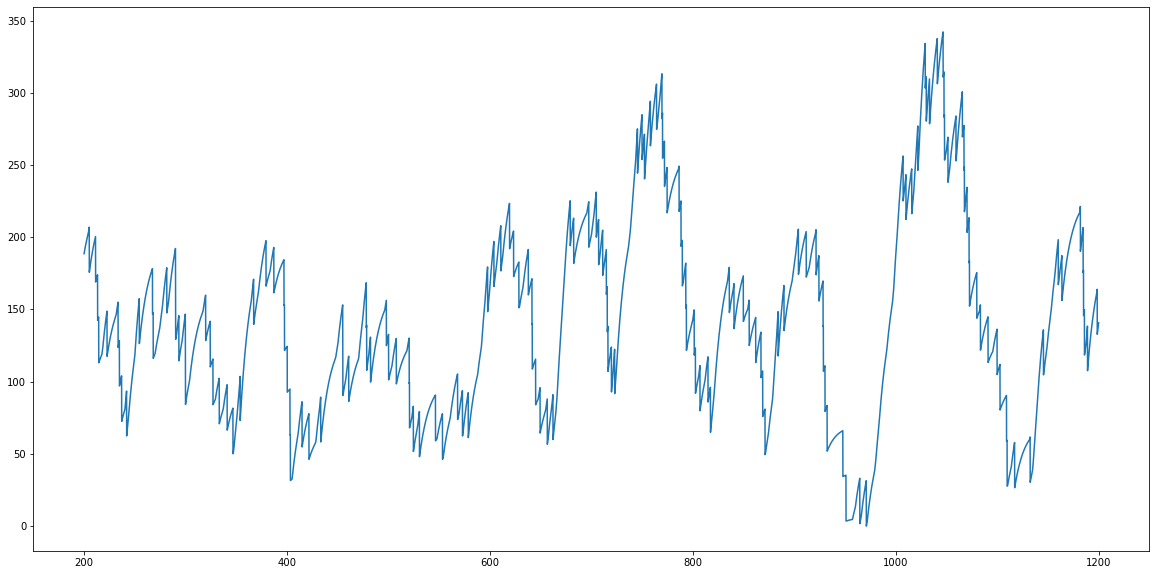

In [150]:
fig, ax = plt.subplots()

ax.plot(x_global[2000:], y_global[2000:] )

# ax.set_ylim(1500,2500)
fig.set_size_inches((20, 10))

In [151]:
PROTEIN_SIZE = 1300
DELTA_T = 0.1

x_auto, y_auto = autocorrelation(y_global[2000:], DELTA_T, True)
elongation_r, translation_init_r = fit_autocorrelation(x_auto, y_auto, fit_function, protein_size=PROTEIN_SIZE)

print(elongation_r, translation_init_r)

33.74188840847611 0.10983048141923246


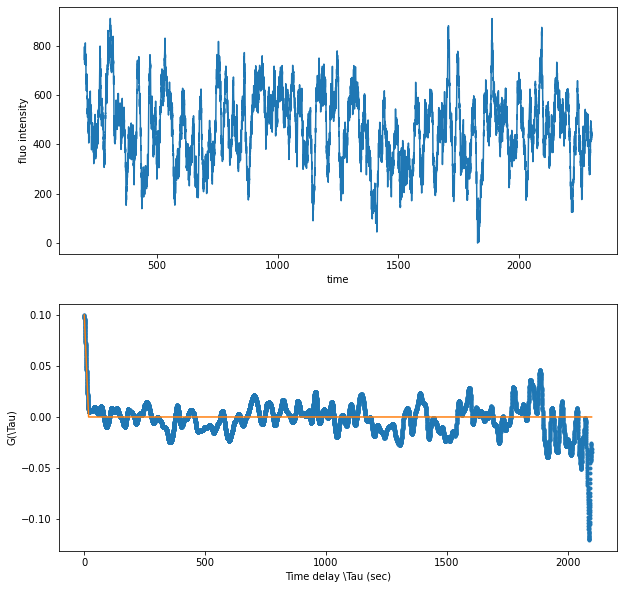

In [213]:
fig, ax = plt.subplots(2,1)
ax[0].plot(x_global[2000:], y_global[2000:])
ax[0].set_xlabel("time")
ax[0].set_ylabel("fluo intensity")

ax[1].plot(x_auto, y_auto, '.')
ax[1].plot(x_auto, fit_function(x_auto, PROTEIN_SIZE/elongation_r, translation_init_r) )
ax[1].set_xlabel("Time delay \Tau (sec)")
ax[1].set_ylabel("G(\Tau)")
fig.set_size_inches((10,10))

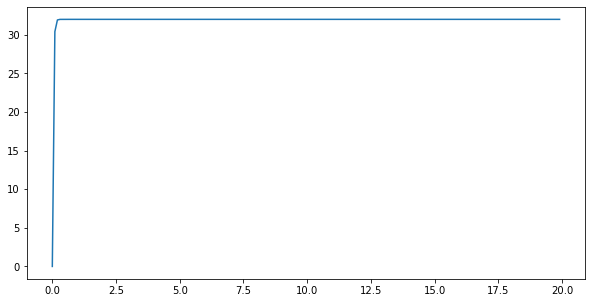

In [225]:
binding_rate = 0.1
ER = []
TI = []

k = 30
fluo_max = 32
x = np.arange(20, step=0.1)
y = fluo_max - fluo_max * np.exp(-k * x)

fig, ax = plt.subplots()
ax.plot(x, y)

fig.set_size_inches((10, 5))



for i in range(100):
    # global signal
    x_global = np.arange(2300, step=0.1)
    y_global = np.zeros(len(x_global))

    for i in range(len(x_global)):
        n_rand = np.random.rand()
        if n_rand < binding_rate:
            if i > (len(x_global)-len(x)):
                y_global[i:i+len(x)] += y[:len(y_global[i:i+len(x)])]
            else:
                y_global[i:i+len(x)] += y
    y_global -= np.min(y_global[2000:])
                
    x_auto, y_auto = autocorrelation(y_global[2000:], DELTA_T, True)
    elongation_r, translation_init_r = fit_autocorrelation(x_auto, y_auto, fit_function, protein_size=PROTEIN_SIZE)

    ER.append(elongation_r)
    TI.append(translation_init_r)

66.19369892542089 0.4493840909351916


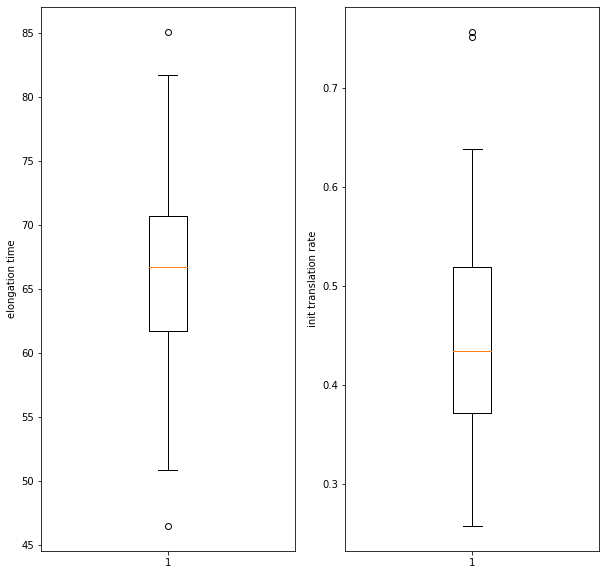

In [226]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(ER)
ax[1].boxplot(TI)
ax[0].set_ylabel('elongation time')
ax[1].set_ylabel('init translation rate')
fig.set_size_inches((10,10))
print(np.mean(ER), np.mean(TI))

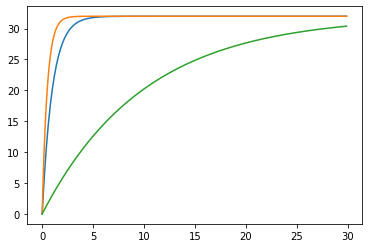

In [218]:
k = 1
fluo_max = 32
x = np.arange(30, step=0.1)
y = fluo_max - fluo_max * np.exp(-k * x)

fig, ax = plt.subplots()
ax.plot(x, y)
k = 2
fluo_max = 32
x = np.arange(30, step=0.1)
y = fluo_max - fluo_max * np.exp(-k * x)
ax.plot(x, y)

k = 0.1
fluo_max = 32
x = np.arange(30, step=0.1)
y = fluo_max - fluo_max * np.exp(-k * x)
ax.plot(x, y)